In [41]:
# !git clone ''

# 데이터 준비(수집,준비)

- quality : target 값

In [42]:
import pandas as pd
import numpy as np

test = pd.read_csv('/content/drive/MyDrive/cloud_ai/3.머신러닝/playground-series-season-3-episode-5/test.csv', index_col='Id')
train = pd.read_csv('/content/drive/MyDrive/cloud_ai/3.머신러닝/playground-series-season-3-episode-5/train.csv',index_col='Id')
submission = pd.read_csv('/content/drive/MyDrive/cloud_ai/3.머신러닝/playground-series-season-3-episode-5/sample_submission.csv',index_col='Id')
train.shape, test.shape, submission.shape

((2056, 12), (1372, 11), (1372, 1))

- 원본 데이터 추가

In [43]:
wine_ori = pd.read_csv('/content/drive/MyDrive/cloud_ai/3.머신러닝/playground-series-season-3-episode-5/WineQT.csv', index_col='Id')
wine_ori.shape

(1143, 12)

### 데이터 결측치 확인

In [44]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2056 entries, 0 to 2055
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         2056 non-null   float64
 1   volatile acidity      2056 non-null   float64
 2   citric acid           2056 non-null   float64
 3   residual sugar        2056 non-null   float64
 4   chlorides             2056 non-null   float64
 5   free sulfur dioxide   2056 non-null   float64
 6   total sulfur dioxide  2056 non-null   float64
 7   density               2056 non-null   float64
 8   pH                    2056 non-null   float64
 9   sulphates             2056 non-null   float64
 10  alcohol               2056 non-null   float64
 11  quality               2056 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 208.8 KB


In [45]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1372 entries, 2056 to 3427
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1372 non-null   float64
 1   volatile acidity      1372 non-null   float64
 2   citric acid           1372 non-null   float64
 3   residual sugar        1372 non-null   float64
 4   chlorides             1372 non-null   float64
 5   free sulfur dioxide   1372 non-null   float64
 6   total sulfur dioxide  1372 non-null   float64
 7   density               1372 non-null   float64
 8   pH                    1372 non-null   float64
 9   sulphates             1372 non-null   float64
 10  alcohol               1372 non-null   float64
dtypes: float64(11)
memory usage: 128.6 KB


In [46]:
wine_ori.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1143 entries, 0 to 1597
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 116.1 KB


- 해석 
  - 모든 데이터에 결측치는 없다

- 타겟 값 확인

In [47]:
train['quality'].unique()

array([6, 7, 5, 4, 8, 3])

- 피처 띄어쓰기 지우기

In [48]:
for feat in train.iloc[:,:7].columns:
  train.rename(columns={f'{feat}': feat.replace(' ', '_')}, inplace=True)

## 요약표 - summary

### train 

In [49]:
summary = pd.DataFrame(train.dtypes, columns=['dtype']).reset_index().rename(columns={'index': 'features'})
def make_summary(df):
    print(f'데이터셋 형상: {df.shape}')
    summary = pd.DataFrame(df.dtypes, columns=['데이터 타입'])
    summary = summary.reset_index()
    summary = summary.rename(columns={'index': '피처'})
    summary['결측값 개수'] = df.isnull().sum().values
    summary['고윳값 개수'] = df.nunique().values
    summary['첫 번째 값'] = df.loc[0].values
    summary['두 번째 값'] = df.loc[1].values
    summary['세 번째 값'] = df.loc[2].values
    return summary
summary = make_summary(train)
summary


데이터셋 형상: (2056, 12)


,피처,데이터 타입,결측값 개수,고윳값 개수,첫 번째 값,두 번째 값,세 번째 값
0,fixed_acidity,float64,0,87,8.00000,9.30000,7.1000
1,volatile_acidity,float64,0,113,0.50000,0.30000,0.5100
2,citric_acid,float64,0,71,0.39000,0.73000,0.0300
3,residual_sugar,float64,0,66,2.20000,2.30000,2.1000
4,chlorides,float64,0,103,0.07300,0.09200,0.0590
5,free_sulfur_dioxide,float64,0,49,30.00000,30.00000,3.0000
6,total_sulfur_dioxide,float64,0,126,39.00000,67.00000,12.0000
7,density,float64,0,313,0.99572,0.99854,0.9966
8,pH,float64,0,77,3.33000,3.32000,3.5200
9,sulphates,float64,0,73,0.77000,0.67000,0.7300


### wine_ori 원본데이터

In [50]:
make_summary(wine_ori)

데이터셋 형상: (1143, 12)


,피처,데이터 타입,결측값 개수,고윳값 개수,첫 번째 값,두 번째 값,세 번째 값
0,fixed acidity,float64,0,91,7.4000,7.8000,7.800
1,volatile acidity,float64,0,135,0.7000,0.8800,0.760
2,citric acid,float64,0,77,0.0000,0.0000,0.040
3,residual sugar,float64,0,80,1.9000,2.6000,2.300
4,chlorides,float64,0,131,0.0760,0.0980,0.092
5,free sulfur dioxide,float64,0,53,11.0000,25.0000,15.000
6,total sulfur dioxide,float64,0,138,34.0000,67.0000,54.000
7,density,float64,0,388,0.9978,0.9968,0.997
8,pH,float64,0,87,3.5100,3.2000,3.260
9,sulphates,float64,0,89,0.5600,0.6800,0.650


## 시각화

### 타겟데이터 분포도 확인

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

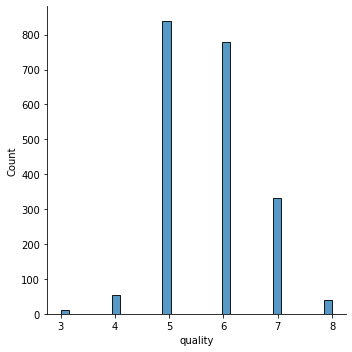

In [52]:
sns.displot( train['quality'] );

### 각 피처 분포도 확인

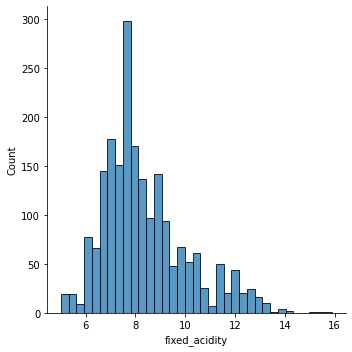

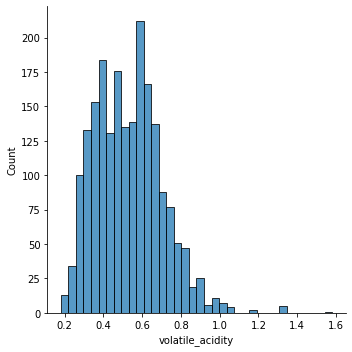

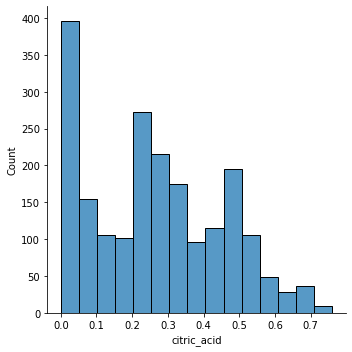

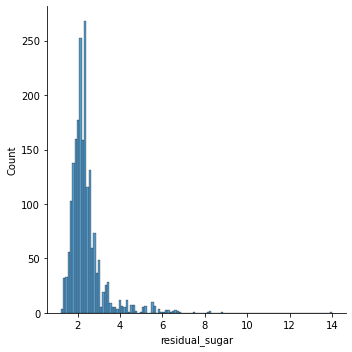

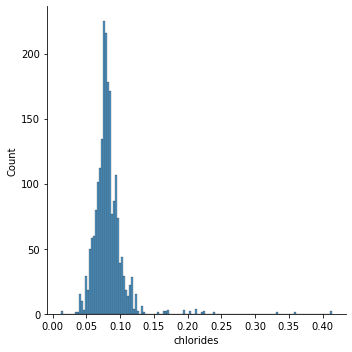

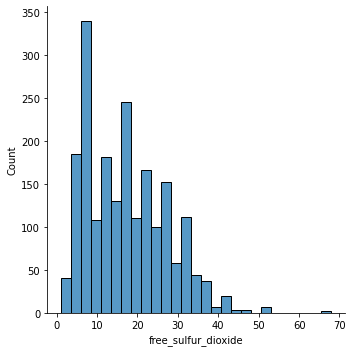

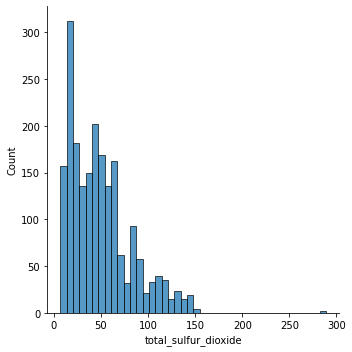

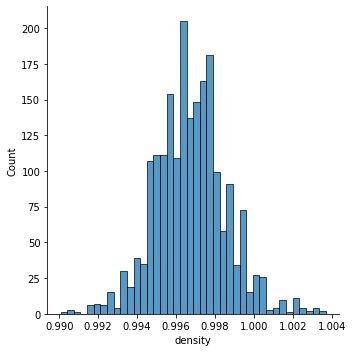

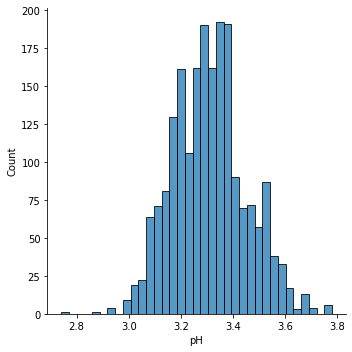

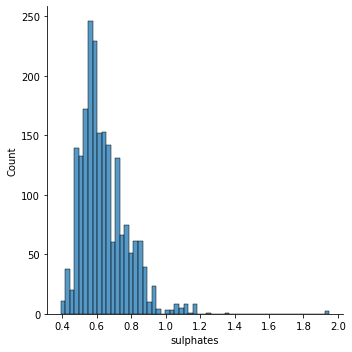

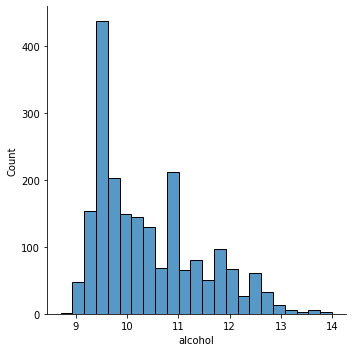

In [53]:
# 바차트
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
for idx,feat in enumerate(train.iloc[:,:-1].columns) :
  sns.displot((train[feat]))

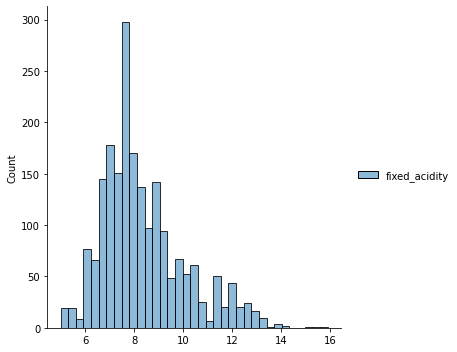

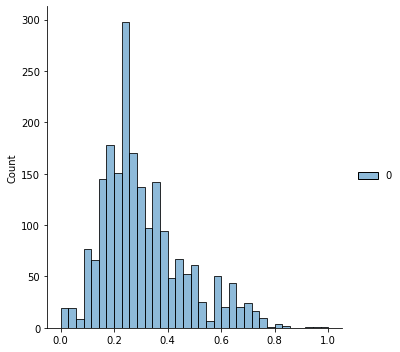

In [54]:
sns.displot((train[['fixed_acidity']]))
sns.displot( MinMaxScaler().fit_transform(train[['fixed_acidity']]))


- 해석 
  - 스케일러를 한 데이터와 원본 데이터의 분포도가 유사하고 정규분포 형태로 나타남
  - MinMaxScaler 사용

### 연속형 데이터 시각화 - 산점도, 산포도 

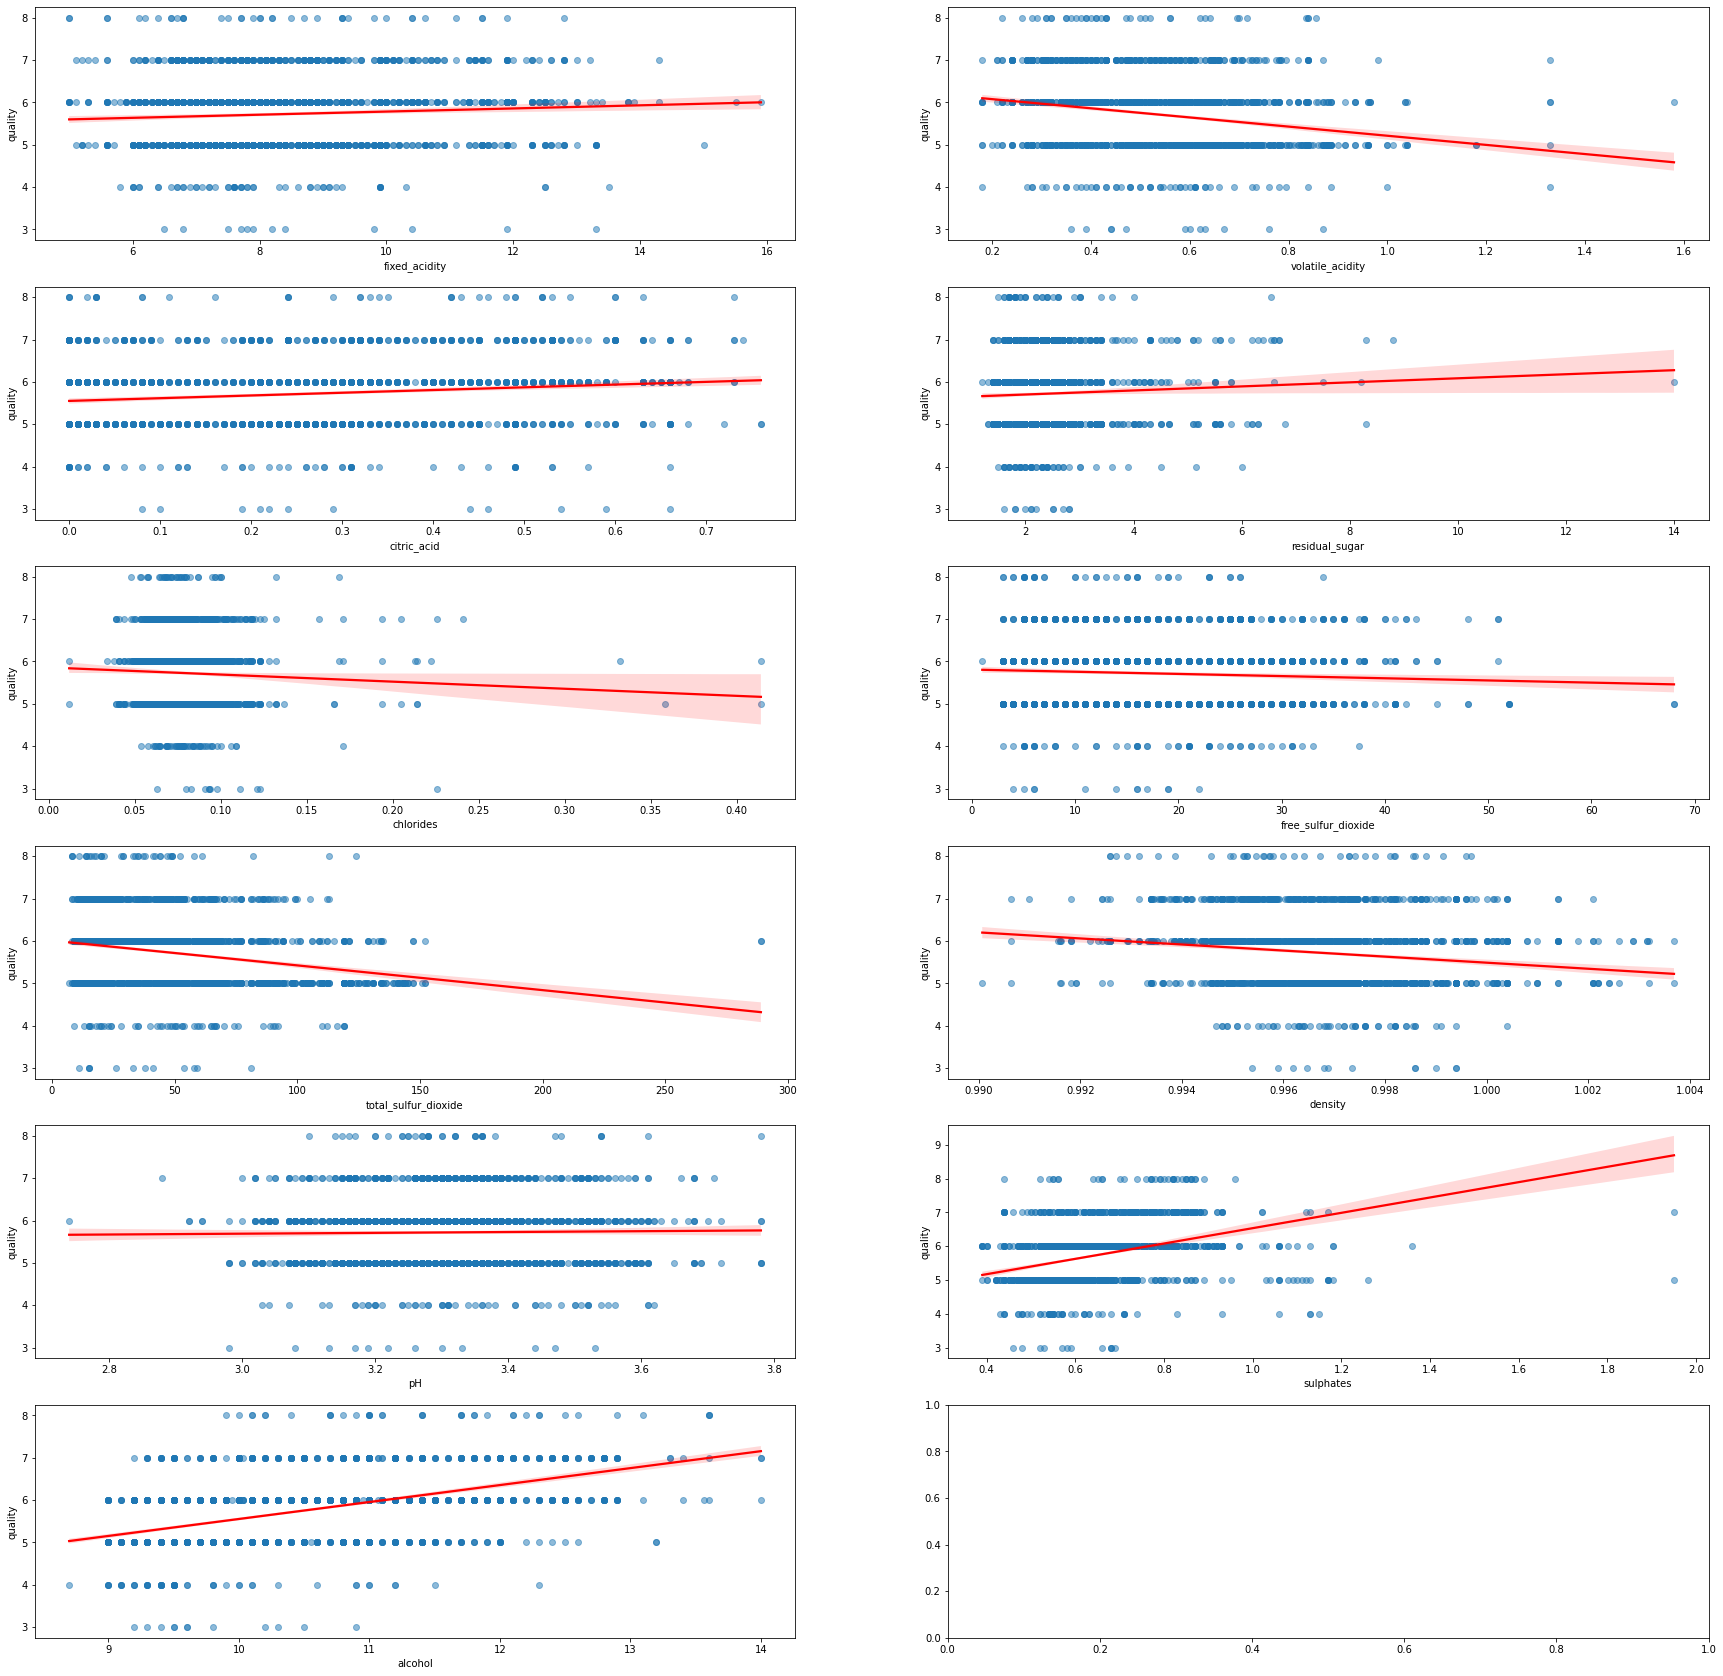

In [55]:
# 3줄 2칸 행렬형태로 차트 준비
fig, axes = plt.subplots(nrows=6, ncols=2,)
fig.set_size_inches(30,30) # 전체 크기 조정

# 바차트
for idx,feat in enumerate(train.iloc[:,:-1].columns) :
  sns.regplot(x=feat, y='quality', data=train, ax=axes[idx//2, idx%2], line_kws={'color': 'red'}, scatter_kws={'alpha':0.5})
  


- 해석 
  - 타겟값이 대부분 5,6에 집중되어 있는 만큼 빨간선이 5와 6사이에 위치할수록 영향도가 큼
  - 하지만, 영향도가 적은 피처를 사용하지 않는다면 점수가 떨어짐

### 피처간 상관관계 파악

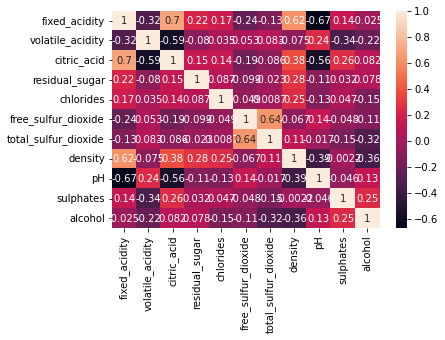

In [56]:
corr_values = train.iloc[:,:-1].corr()
sns.heatmap(corr_values, annot=True)

- 해석 
  - 0.9 초과 x -> 강한 상관관계가 없다

### 이상치 확인
  - residual_sugar 에서 14보다 큰 값은 test 데이터에 없음 -> 제거
  - chlorides 에서 이상치 값은 test 값에서도 존재 -> 유지
  - sulphates 에서 train은 2.0에 근접한 값이 있고, test는 1.6이 있음 -> 비슷하니깐 유지

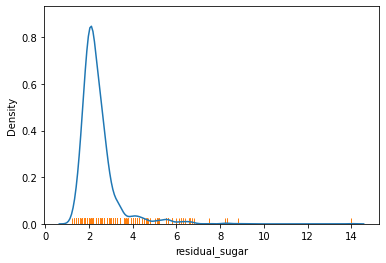

In [57]:
# 이상치 : residual_sugar, 
sns.kdeplot(data=train, x='residual_sugar')
sns.rugplot(data=train, x='residual_sugar');

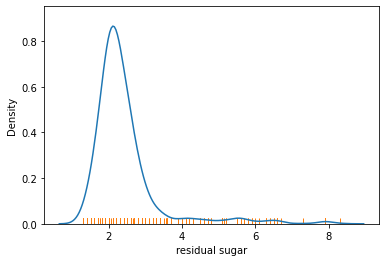

In [58]:
sns.kdeplot(data=test, x='residual sugar')
sns.rugplot(data=test, x='residual sugar');

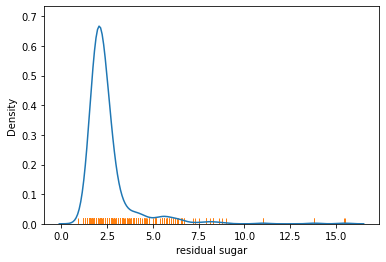

In [59]:
sns.kdeplot(data=wine_ori, x='residual sugar')
sns.rugplot(data=wine_ori, x='residual sugar');

# EDA 분석

- train, test 데이터 
  - 피처 파악
      - 모든 데이터가 실수형 -> 연속형
      - 데이터의 범위가 피처마다 제각각,

  - 타겟데이터(quality) 분포도 확인
    - 5 값이 가장 많다
    - 타겟데이터가 분류형과 유사
    - 각각의 실수형 데이터를 분류모델로 학습해서 분류형태로 가야함

  - 연속형 데이터 시각화 - 산점도, 산포도 
    - quality 5와6의 값이 가장 많아서, 중앙에서 떨어지거나, 올라가는 추세가 보임
    - 타겟값이 대부분 5,6에 집중되어 있는 만큼 빨간선이 5와 6사이에 위치할수록 영향도가 큼

  - 피처간 상관관계 파악
    - 0.9 초과 x -> 강한 상관관계가 없다

  - 이상치 
    -  residual_sugar, chlorides, sulphates 에서 동떨어진 데이터 확인
      - **residual_sugar 에서 14보다 큰 값은 test 데이터에 없음 -> 제거**
      - 나머지는 test 데이터에서도 유사하게 존재 -> 유지
  - 결측치
    - train, test 데이터 모두 결측치 없음


- 추가 데이터 Wine_ori
  - 대체로 train 데이터의 분포와 유사
  - 이상치
    - residual_sugar 에서 14보다 큰 값이 4개 존재, 
    - train 데이터와 차별을 주기 위해서, 훼손하지 않고 진행
  - 결측치
    - 결측치 없음


## cohen_kappa_score
  - 대회에서 평가하는 수식,
  - 캐글 토론에서 참고하여 사용
  - 1에 가까울수록 좋은 지표

# 베이스라인

## 데이터 준비

In [60]:
import pandas as pd
import numpy as np
# 스케일링
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, KFold
# 알고리즘
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
# 기타
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import cohen_kappa_score, accuracy_score

In [61]:
test = pd.read_csv('/content/drive/MyDrive/cloud_ai/3.머신러닝/playground-series-season-3-episode-5/test.csv', index_col='Id')
train = pd.read_csv('/content/drive/MyDrive/cloud_ai/3.머신러닝/playground-series-season-3-episode-5/train.csv',index_col='Id')
submission = pd.read_csv('/content/drive/MyDrive/cloud_ai/3.머신러닝/playground-series-season-3-episode-5/sample_submission.csv',index_col='Id')
train.shape, test.shape, submission.shape

((2056, 12), (1372, 11), (1372, 1))

### 오리진 데이터

In [62]:
wine_ori = pd.read_csv('/content/drive/MyDrive/cloud_ai/3.머신러닝/playground-series-season-3-episode-5/WineQT.csv', index_col='Id')
wine_ori.shape

(1143, 12)

In [63]:
# 데이터 타입 설정
train['data_type'] = 1
test['data_type'] = 1
wine_ori['data_type'] = 0

In [64]:
# 오리진 데이터 합산
train = pd.concat([train, wine_ori], axis=0)
train.shape

(3199, 13)

In [65]:
# 이상치 제거 
train  = train[train['residual sugar'].apply(lambda x : x < 13)]

In [66]:
# 데이터 통합
train_test_df = pd.concat([train.drop( columns= train.iloc[:,[-2]]), test], axis=0).reset_index(drop=True)
y = train['quality']

In [67]:
# 스케일링
for feat in train_test_df.columns :
  train_test_df[feat] = MinMaxScaler().fit_transform(train_test_df[[feat]])

In [68]:
# 데이터 나누기
X = np.array(train_test_df.iloc[:3194,:])
X_sub = np.array(train_test_df.iloc[3194:,:])
X.shape, X_sub.shape, y.shape

((3194, 12), (1372, 12), (3194,))

In [69]:
# train, test 데이터 생성
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2395, 12), (799, 12), (2395,), (799,))

## 학습

In [70]:
# 파라미터
params = {
  # 기본값
}

# 생성
rf_model = RandomForestClassifier(**params)
xgb_model = XGBClassifier(**params)
lgb_model = LGBMClassifier(**params)

# 학습
rf_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)
lgb_model.fit(X_train, y_train)

# 예측
y_pred_rf = rf_model.predict(X_test)
y_pred_xgb = xgb_model.predict(X_test)
y_pred_lgb = lgb_model.predict(X_test)


## cohen_kappa_score
  - 대회에서 평가하는 수식,
  - 캐글 토론에서 참고하여 사용
  - 1에 가까울수록 좋은 지표

In [71]:
print('RandomForestClassifier : \t',cohen_kappa_score(y_test,  y_pred_rf, weights = "quadratic"))
print('XGBClassifier : \t',cohen_kappa_score(y_test,  y_pred_xgb, weights = "quadratic"))
print('LGBMClassifier : \t',cohen_kappa_score(y_test,  y_pred_lgb, weights = "quadratic"))

RandomForestClassifier : 	 0.5360659346707395
XGBClassifier : 	 0.5066753264491779
LGBMClassifier : 	 0.5590178226128908


## 제출

In [72]:
# 제출
sub_y_pred = xgb_model.predict( X_sub )
submission['quality'] = sub_y_pred
submission.to_csv( 'submission.csv' )

## 베이스라인 분석 결과

- EDA에 따라서 실행한 결과
  - 데이터를 스케일러 처리를 한 것 보다 안한것이 더 좋게 나왔다.
  - 이상치는 원본데이터(train)데이터만 처리한 것이 더 높게 나왔다
  - 각각의 피처를 제거하면서 수행한 결과 모든 피처를 살리는 방향이 더 높게 나왔다
  - xgb, lgb, cat, randomforest의 알고리즘을 수행한 결과 randomforest -> xgb -> lgb -> cat 순이였다. 
  - 캐글에서 많은 사람들이 사용한 새로운 피처를 생성하는 방식은 우리 데이터에서는 성능이 더 낮게 나왔다
  

## xgb 피처 중요도 시각화

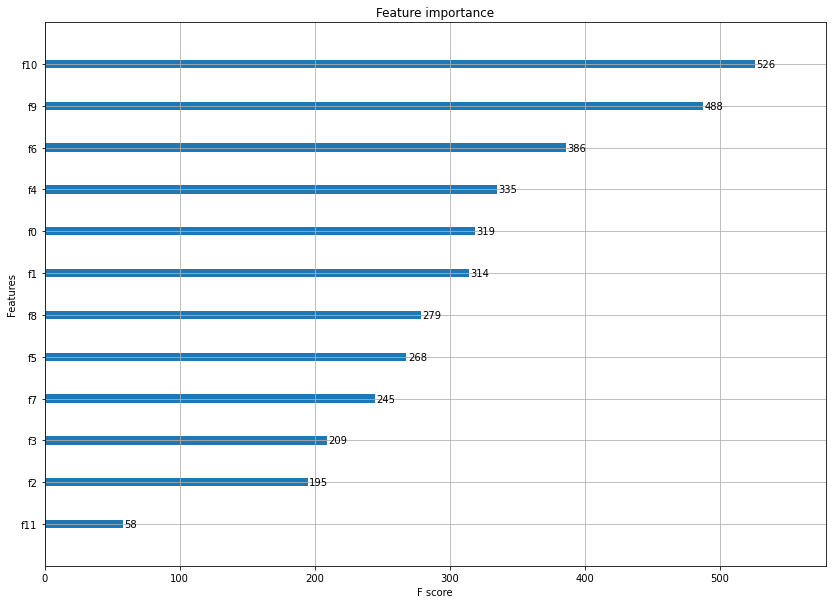

In [73]:
# 변수 중요도 시각화
from xgboost import plot_importance

_, ax = plt.subplots( figsize=(14,10) )
plot_importance( xgb_model, ax=ax );

- f11 -> 지우나 쓰나 점수에 크게 변동이 없어서 그냥 사용
- 나머지 피처는 제거시, 점수가 크게 하락함

# 최적화

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# 스케일링
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold
# 알고리즘
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
# 기타
from sklearn.metrics import cohen_kappa_score, accuracy_score
from sklearn.preprocessing import LabelEncoder
from scipy.stats import mode

# 데이터 준비
test = pd.read_csv('/content/drive/MyDrive/cloud_ai/3.머신러닝/playground-series-season-3-episode-5/test.csv', index_col='Id')
train = pd.read_csv('/content/drive/MyDrive/cloud_ai/3.머신러닝/playground-series-season-3-episode-5/train.csv',index_col='Id')
submission = pd.read_csv('/content/drive/MyDrive/cloud_ai/3.머신러닝/playground-series-season-3-episode-5/sample_submission.csv')
wine_ori = pd.read_csv('/content/drive/MyDrive/cloud_ai/3.머신러닝/playground-series-season-3-episode-5/WineQT.csv', index_col='Id')

# 데이터 타입 설정
train['data_type'] = 1
test['data_type'] = 1
wine_ori['data_type'] = 0

# 이상치 제거 
train  = train[train['residual sugar'].apply(lambda x : x < 13)]

# 오리진 데이터 합산
train = pd.concat([train, wine_ori], axis=0)

# 인덱스 리셋, 인덱스 컬럼 날리기
train = train.reset_index(drop=True)

# 타겟 값 라벨링 -> [3,4,5,6,7,8] -> [0,1,2,3,4,5] 값으로 변경
encoder = LabelEncoder()
train['quality'] = encoder.fit_transform(train['quality'])



In [75]:
# KFold 사용
n=5
cv = StratifiedKFold( n,shuffle=True, random_state=42)

# 피처 목록 ( 'id', 'quality' 제외 )
features = [c for c in train.columns if c not in ['id', 'quality']]

# 각 kfold의 예측값을 배열에 삽입하기 위한 그릇
test_preds = []

for i,(train_idx,val_idx) in enumerate(cv.split(train[features],train['quality'])):
    X_train, y_train = train.loc[train_idx, features],train.loc[train_idx, 'quality']
    X_val, y_val = train.loc[val_idx, features],train.loc[val_idx, 'quality']
    
    # optuna를 이용해 찾은 파라미터 -> 미세하게 조정
    params={
        'n_estimators': 394,
        'num_leaves': 7,
        'min_child_samples': 3,
        'learning_rate': 0.20180592, #0.15961062177409088
        'colsample_bytree': 0.9999857982053186, #0.9999857982053186
        'reg_alpha': 0.0017, #0.0009765625
        'reg_lambda': 0.009702, #0.0009765625
    }
    
    # 모델 생성
    model = LGBMClassifier(**params)

    # 훈련
    model.fit(X_train, y_train, eval_set = [(X_val,y_val)], early_stopping_rounds=200, verbose=200)
    # 예측
    y_pred = model.predict(X_val)
    # 평가
    score = cohen_kappa_score(y_val,  y_pred, weights = "quadratic")
    test_pred = model.predict(test[features])
    test_preds.append(test_pred)
    print(f'=== Fold {i} Cohen Kappa Score {np.mean([score])} ===')


Training until validation scores don't improve for 200 rounds.
[200]	valid_0's multi_logloss: 1.08791
Early stopping, best iteration is:
[31]	valid_0's multi_logloss: 0.95572
=== Fold 0 Cohen Kappa Score 0.5008827108650566 ===
Training until validation scores don't improve for 200 rounds.
[200]	valid_0's multi_logloss: 1.08706
Early stopping, best iteration is:
[47]	valid_0's multi_logloss: 1.0004
=== Fold 1 Cohen Kappa Score 0.5152547369110592 ===
Training until validation scores don't improve for 200 rounds.
[200]	valid_0's multi_logloss: 1.19071
Early stopping, best iteration is:
[48]	valid_0's multi_logloss: 1.0552
=== Fold 2 Cohen Kappa Score 0.5005076950644075 ===
Training until validation scores don't improve for 200 rounds.
[200]	valid_0's multi_logloss: 1.05714
Early stopping, best iteration is:
[41]	valid_0's multi_logloss: 0.981831
=== Fold 3 Cohen Kappa Score 0.5214758967329222 ===
Training until validation scores don't improve for 200 rounds.
[200]	valid_0's multi_logloss:

- 

In [76]:
# np.column_stack : 배열의 각 행을 하나의 배열로 합쳐서 재구성하는 함수
# mode : 최빈값 계산 함수
# np.squeeze : 차원 축소 함수, [[1,2,3,4]] -> [1,2,3,4]
# encoder.inverse_transform : 라벨링 한 것을 다시 역변환하는 함수

submission['quality'] = encoder.inverse_transform(np.squeeze(mode(np.column_stack(test_preds),axis = 1)[0]).astype('int'))
submission.to_csv('submission.csv', index=False)

In [77]:
# 캐글 자동 제출

#!pip install kaggle
#!mkdir -p ~/.kaggle
# 캐글 account에서 kaggle.json 파일 가져오기
#!cp kaggle.json ~/.kaggle/
#!chmod 600 ~/.kaggle/kaggle.json
# !kaggle competitions submit -c playground-series-s3e5 -f submission.csv -m "Message"

In [78]:
# readme.md 파일로 변환
!jupyter nbconvert --to markdown "/content/drive/MyDrive/cloud_ai/3.머신러닝/playground-series-season-3-episode-5.ipynb"

[NbConvertApp] Converting notebook /content/drive/MyDrive/cloud_ai/3.머신러닝/playground-series-season-3-episode-5.ipynb to markdown
[NbConvertApp] Support files will be in playground-series-season-3-episode-5_files/
[NbConvertApp] Making directory /content/drive/MyDrive/cloud_ai/3.머신러닝/playground-series-season-3-episode-5_files
[NbConvertApp] Making directory /content/drive/MyDrive/cloud_ai/3.머신러닝/playground-series-season-3-episode-5_files
[NbConvertApp] Making directory /content/drive/MyDrive/cloud_ai/3.머신러닝/playground-series-season-3-episode-5_files
[NbConvertApp] Making directory /content/drive/MyDrive/cloud_ai/3.머신러닝/playground-series-season-3-episode-5_files
[NbConvertApp] Making directory /content/drive/MyDrive/cloud_ai/3.머신러닝/playground-series-season-3-episode-5_files
[NbConvertApp] Making directory /content/drive/MyDrive/cloud_ai/3.머신러닝/playground-series-season-3-episode-5_files
[NbConvertApp] Making directory /content/drive/MyDrive/cloud_